<a href="https://colab.research.google.com/github/JiHoonMin/deeplearning/blob/main/Fishdata_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Copy data zip files to Colab working space

In [ ]:
!cp -r '/content/drive/My Drive/fish_data_small.zip' fish_data_small.zip
!cp -r '/content/drive/My Drive/fish_data.zip' fish_data.zip

# Extract zip files

In [ ]:
!unzip /content/fish_data_small.zip
!unzip /content/fish_data.zip

Archive:  /content/fish_data_small.zip
   creating: fish_data_small/
   creating: fish_data_small/test/
   creating: fish_data_small/test/10_Kanari/
  inflating: fish_data_small/test/10_Kanari/00 (15).jpg  
  inflating: fish_data_small/test/10_Kanari/00 (15)1.jpg  
  inflating: fish_data_small/test/10_Kanari/00 (21).jpg  
  inflating: fish_data_small/test/10_Kanari/00 (3).jpg  
  inflating: fish_data_small/test/10_Kanari/00 (3)1.jpg  
  inflating: fish_data_small/test/10_Kanari/00 (3)2.jpg  
  inflating: fish_data_small/test/10_Kanari/00 (34).jpg  
  inflating: fish_data_small/test/10_Kanari/1 (30).jpg  
  inflating: fish_data_small/test/10_Kanari/1 (31).jpg  
  inflating: fish_data_small/test/10_Kanari/1 (35).jpg  
  inflating: fish_data_small/test/10_Kanari/1 (36).jpg  
  inflating: fish_data_small/test/10_Kanari/1 (43).jpg  
  inflating: fish_data_small/test/10_Kanari/1 (43)1.jpg  
  inflating: fish_data_small/test/10_Kanari/1 (45).jpg  
  inflating: fish_data_small/test/10_Kanari/1

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import backend as K

In [ ]:
# // train_data path
train_path = "/content/fish_data_small/train/"
#// test_data path
test_path="/content/fish_data_small/test/"

# Get the data labels

In [ ]:
labels=[]
label_paths = glob.glob(train_path+"*")
for t_path in label_paths:
    labels.append(t_path[len(train_path):])
labels.sort()
print(labels)

['10_Kanari', '1_Ko_dung_uh', '2_Thom_bang_yi', '3_Bang_uh_dom', '4_Bum-dom', '5_Yong-chi', '6_Cham_dom', '7_Jul_jun', '8_Gam_sung_dom', '9_Nong_uh']


# Load training data

In [ ]:
picture_size = 150
train_data = []
train_data_label =[]

for label in labels:
    print (label)
    img_files = glob.glob(train_path+label+"/*.*")
    num_label = labels.index(label)
    print("data size for " + label + " : " + str(len(img_files)))
    for img_file in img_files:
        #print("loading "+img_file)
        img = cv2.imread(img_file)
        img = cv2.resize(img,(picture_size,picture_size))
        train_data.append(img)
        train_data_label.append(num_label)

10_Kanari
data size for 10_Kanari : 200
1_Ko_dung_uh
data size for 1_Ko_dung_uh : 200
2_Thom_bang_yi
data size for 2_Thom_bang_yi : 200
3_Bang_uh_dom
data size for 3_Bang_uh_dom : 200
4_Bum-dom
data size for 4_Bum-dom : 200
5_Yong-chi
data size for 5_Yong-chi : 200
6_Cham_dom
data size for 6_Cham_dom : 200
7_Jul_jun
data size for 7_Jul_jun : 200
8_Gam_sung_dom
data size for 8_Gam_sung_dom : 200
9_Nong_uh
data size for 9_Nong_uh : 200


Label:  5_Yong-chi


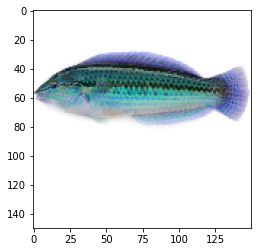

In [ ]:
plt.imshow(train_data[1000])
print("Label: ", labels[train_data_label[1000]])
plt.show()

In [ ]:
len(train_data)

2000

In [ ]:
train_data[0].shape

(150, 150, 3)

# Load test data

In [ ]:
picture_size = 150
test_data = []
test_data_label =[]

for label in labels:
    print (label)
    img_files = glob.glob(test_path+label+"/*.*")
    num_label = labels.index(label)
    print("data size for " + label + " : " + str(len(img_files)))
    for img_file in img_files:
        img = cv2.imread(img_file)
        img = cv2.resize(img,(picture_size,picture_size))
        test_data.append(img)
        test_data_label.append(num_label)

10_Kanari
data size for 10_Kanari : 20
1_Ko_dung_uh
data size for 1_Ko_dung_uh : 20
2_Thom_bang_yi
data size for 2_Thom_bang_yi : 20
3_Bang_uh_dom
data size for 3_Bang_uh_dom : 20
4_Bum-dom
data size for 4_Bum-dom : 20
5_Yong-chi
data size for 5_Yong-chi : 20
6_Cham_dom
data size for 6_Cham_dom : 20
7_Jul_jun
data size for 7_Jul_jun : 20
8_Gam_sung_dom
data size for 8_Gam_sung_dom : 20
9_Nong_uh
data size for 9_Nong_uh : 20


In [ ]:
len(test_data)

200

In [ ]:
test_data[0].shape

(150, 150, 3)

# Data preparation

In [ ]:
x = np.array(train_data)
y = np.array(train_data_label)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.2,random_state = 230)
Y_train = to_categorical(y_train, len(labels))
Y_val = to_categorical(y_val, len(labels))


X_test = np.array(test_data)
y_test = np.array(test_data_label)
Y_test = to_categorical(y_test, len(labels))

# Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
# for training data, we apply normalize, randomly rotate, shift and flip, etc.

val_test_datagen = ImageDataGenerator(rescale=1./255.)
# for validation and test sets, we only normalize

train_generator = train_datagen.flow(X_train,Y_train,batch_size=64)
validation_generator = val_test_datagen.flow(X_val,Y_val,batch_size=64)
test_generator = val_test_datagen.flow(X_test,Y_test,batch_size=64)

# Build model

In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights= 'imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

conv_base.trainable = False
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 16,814,666
Trainable params: 2,099,978
Non-trainable params: 14,714,688
_________________________________________________________________


# Train model

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "/content/drive/My Drive/Colab Notebooks/my_fish_model.h5",
    monitor='val_acc',verboss=1,save_best_only=True)

epoch_num = 20
history = model.fit(train_generator,
                    epochs=epoch_num,
                    validation_data= validation_generator,
                    callbacks= [checkpoint_cb])

Epoch 1/20
25/25 [==============================] - 9s 365ms/step - loss: 0.5163 - acc: 0.8406 - val_loss: 0.6365 - val_acc: 0.8025
Epoch 2/20
25/25 [==============================] - 9s 354ms/step - loss: 0.3385 - acc: 0.8775 - val_loss: 0.7807 - val_acc: 0.7850
Epoch 3/20
25/25 [==============================] - 10s 382ms/step - loss: 0.3844 - acc: 0.8537 - val_loss: 0.6719 - val_acc: 0.8200
Epoch 4/20
25/25 [==============================] - 9s 353ms/step - loss: 0.3529 - acc: 0.8775 - val_loss: 0.6620 - val_acc: 0.8125
Epoch 5/20
25/25 [==============================] - 9s 357ms/step - loss: 0.3593 - acc: 0.8775 - val_loss: 0.7036 - val_acc: 0.8075
Epoch 6/20
25/25 [==============================] - 9s 353ms/step - loss: 0.3435 - acc: 0.8769 - val_loss: 0.6687 - val_acc: 0.8075
Epoch 7/20
25/25 [==============================] - 10s 380ms/step - loss: 0.3664 - acc: 0.8700 - val_loss: 0.6628 - val_acc: 0.8300
Epoch 8/20
25/25 [==============================] - 9s 350ms/step - loss: 

In [ ]:
new_model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/my_fish_model.h5")

NameError: ignored

In [ ]:
new_model.evaluate(test_generator)

4/4 [==============================] - 1s 158ms/step - loss: 0.6763 - acc: 0.8050


[0.6762755513191223, 0.8050000071525574]

# exercise

In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights= 'imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

conv_base.trainable = True
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 16,838,806
Trainable params: 16,838,806
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "/content/drive/My Drive/Colab Notebooks/my_fish_model.h5",
    monitor='val_acc',verboss=1,save_best_only=True)

epoch_num = 20
history = model.fit(train_generator,
                    epochs=epoch_num,
                    validation_data= validation_generator,
                    callbacks= [checkpoint_cb])

Epoch 1/20
25/25 [==============================] - 12s 496ms/step - loss: 1120.7102 - acc: 0.0919 - val_loss: 2.3070 - val_acc: 0.0875
Epoch 2/20
25/25 [==============================] - 13s 540ms/step - loss: 2.3163 - acc: 0.1000 - val_loss: 2.3008 - val_acc: 0.1275
Epoch 3/20
25/25 [==============================] - 12s 484ms/step - loss: 2.3987 - acc: 0.1088 - val_loss: 2.4272 - val_acc: 0.1275
Epoch 4/20
25/25 [==============================] - 12s 477ms/step - loss: 2.4964 - acc: 0.1044 - val_loss: 2.2971 - val_acc: 0.0725
Epoch 5/20
25/25 [==============================] - 12s 471ms/step - loss: 2.3084 - acc: 0.1075 - val_loss: 2.3036 - val_acc: 0.0875
Epoch 6/20
25/25 [==============================] - 12s 467ms/step - loss: 2.3027 - acc: 0.1000 - val_loss: 2.3038 - val_acc: 0.0850
Epoch 7/20
25/25 [==============================] - 12s 467ms/step - loss: 2.3028 - acc: 0.0925 - val_loss: 2.3039 - val_acc: 0.0875
Epoch 8/20
25/25 [==============================] - 12s 468ms/step

In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights= 'imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

conv_base.trainable = False
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_9 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 16,838,806
Trainable params: 2,124,118
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "/content/drive/My Drive/Colab Notebooks/my_fish_model.h5",
    monitor='val_acc',verboss=1,save_best_only=True)

epoch_num = 20
history = model.fit(train_generator,
                    epochs=epoch_num,
                    validation_data= validation_generator,
                    callbacks= [checkpoint_cb])

Epoch 1/20
25/25 [==============================] - 10s 385ms/step - loss: 2.4711 - acc: 0.2581 - val_loss: 1.6202 - val_acc: 0.5250
Epoch 2/20
25/25 [==============================] - 9s 352ms/step - loss: 1.5245 - acc: 0.4719 - val_loss: 1.1978 - val_acc: 0.6125
Epoch 3/20
25/25 [==============================] - 9s 353ms/step - loss: 1.3075 - acc: 0.5362 - val_loss: 1.1542 - val_acc: 0.5675
Epoch 4/20
25/25 [==============================] - 10s 382ms/step - loss: 1.1168 - acc: 0.6087 - val_loss: 0.9846 - val_acc: 0.6775
Epoch 5/20
25/25 [==============================] - 9s 354ms/step - loss: 1.0356 - acc: 0.6369 - val_loss: 0.8540 - val_acc: 0.7250
Epoch 6/20
25/25 [==============================] - 9s 379ms/step - loss: 0.8943 - acc: 0.6981 - val_loss: 0.8430 - val_acc: 0.7300
Epoch 7/20
25/25 [==============================] - 9s 353ms/step - loss: 0.9179 - acc: 0.7006 - val_loss: 0.6950 - val_acc: 0.7750
Epoch 8/20
25/25 [==============================] - 9s 375ms/step - loss: 